In [2]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [3]:
cena_mieszkania = 120000
wzrost_ceny = 0.05
okres_inwestycji = 5
stopa_procentowa = 0.12
kapitalizacja = 12

In [9]:
miesieczna_stopa_procentowa = stopa_procentowa / kapitalizacja
czas = np.arange(1, okres_inwestycji * kapitalizacja + 1)

In [10]:
#Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?
cena_mieszkania_za_5_lat = cena_mieszkania * (1 + wzrost_ceny) ** okres_inwestycji
print("Orientacyjna cena mieszkania za 5 lat:", round(cena_mieszkania_za_5_lat, 2))

Orientacyjna cena mieszkania za 5 lat: 153153.79


In [11]:
#Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?
miesieczna_stopa_procentowa = stopa_procentowa / kapitalizacja
miesieczna_wpłata = npf.pmt(miesieczna_stopa_procentowa, okres_inwestycji * kapitalizacja, -cena_mieszkania_za_5_lat, 0)
print("Miesięczna wpłata na lokatę:", round(miesieczna_wpłata, 2))

Miesięczna wpłata na lokatę: 3406.82


In [12]:
#Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.
wartosc_mieszkania = cena_mieszkania * (1 + wzrost_ceny / kapitalizacja) ** czas
wartosc_lokaty = npf.fv(miesieczna_stopa_procentowa, czas, -miesieczna_wpłata, 0)

Text(0, 0.5, 'Wartość [zł]')

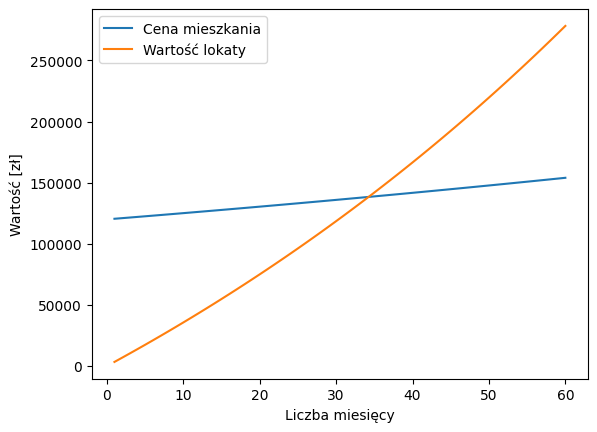

In [14]:
plt.plot(czas, wartosc_mieszkania, label="Cena mieszkania")
plt.plot(czas, wartosc_lokaty, label="Wartość lokaty")
plt.legend()
plt.xlabel("Liczba miesięcy")
plt.ylabel("Wartość [zł]")